In [46]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [47]:
home_data = pd.read_csv('train.csv') 
home_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [48]:
cut_labels = ['Low','Medium','High'] 
cut_bins = [0, 100000, 250000, 500000]
home_data['SalePrice_lable'] = pd.cut(home_data['SalePrice'], bins=cut_bins, labels=cut_labels)

In [49]:
home_data.columns
home_data.head()
y = home_data.SalePrice_lable #NHÃN PHÂN LỚP
#CHỌN CÁC THUỘC TÍNH PHÂN LỚP
home_features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath','BedroomAbvGr','TotRmsAbvGrd']
X = home_data[home_features]
X.describe()
X.head()
y

0       Medium
1       Medium
2       Medium
3       Medium
4       Medium
         ...  
1455    Medium
1456    Medium
1457      High
1458    Medium
1459    Medium
Name: SalePrice_lable, Length: 1460, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [50]:
home_data.columns
home_data.head()
y = home_data.SalePrice_lable #NHÃN PHÂN LỚP
#CHỌN CÁC THUỘC TÍNH PHÂN LỚP
home_features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath','BedroomAbvGr','TotRmsAbvGrd']
X = home_data[home_features]
X.describe()
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


In [55]:
from sklearn.model_selection import train_test_split
#CHIA DỮ LIỆU 80% TRAIN, 20% TEST
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=4)


In [57]:
from sklearn import tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
#Train Decision Tree based on training set
X.fillna(method = 'ffill', inplace = True)
y.fillna(method = 'ffill', inplace = True)
decision_tree.fit(X_train,y_train)

C:\Users\thebao\AppData\Local\Temp\ipykernel_6540\3239692321.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method = 'ffill', inplace = True)


DecisionTreeClassifier()

In [58]:
predictions = decision_tree.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8047945205479452
[[ 23   0  20]
 [  1  15   7]
 [ 16  13 197]]
              precision    recall  f1-score   support

        High       0.57      0.53      0.55        43
         Low       0.54      0.65      0.59        23
      Medium       0.88      0.87      0.88       226

    accuracy                           0.80       292
   macro avg       0.66      0.69      0.67       292
weighted avg       0.81      0.80      0.81       292



In [60]:
target=home_data['SalePrice_lable'].unique()

In [62]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from IPython.display import Image  
import pydotplus
# Create DOT data
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                                feature_names=home_features,  
                                class_names=target) 

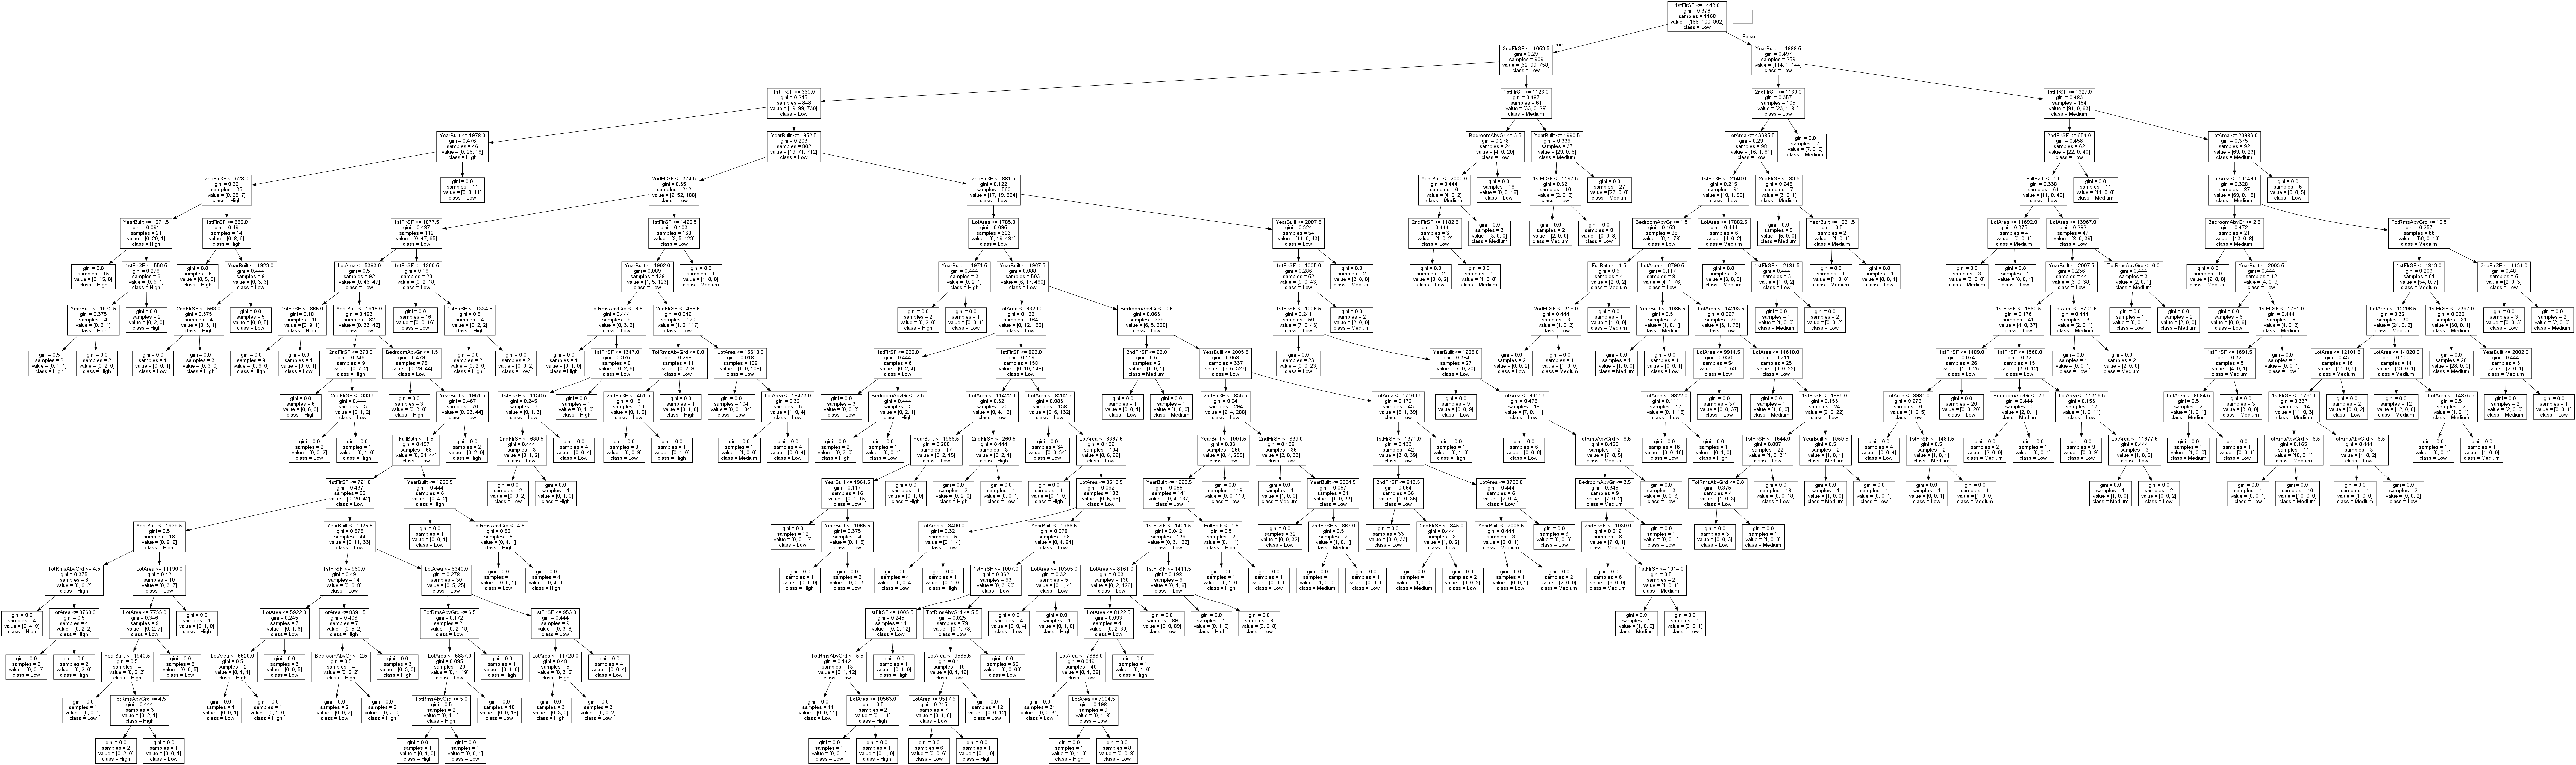

In [64]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

In [65]:
graph.write_pdf("D:/thuchanhKPDL/thuchanhlab8_9/cayquyetdinh2.pdf")
# Create PNG
graph.write_png("D:/thuchanhKPDL/thuchanhlab8_9/home2.png")

True